In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle
import pandas as pd

In [2]:
M_sun = 1.98992e+33 # gram
UnitMass_in_g = 1.0 * M_sun       # !!!!!!!!!!!!!!!!!!!!!!!!! CHANGE !!!!!!!!!!!!!!!!!

grav_const_in_cgs = G = 6.6738e-8
rgas = 9.2e16                                     # The initial radius of the cloud in cm
rho0 = 6.02e-19                                   # The initial average density
tff = np.sqrt(3*np.pi/(32*G*rho0))                # The free-fall time = 3.4e4 yr
unitLength_in_cm = rgas
unitTime_in_s = (unitLength_in_cm**3/grav_const_in_cgs/UnitMass_in_g)**0.5
unitTime_in_kyr = unitTime_in_s/3600/24/365.25/1000

UnitDensity_in_cgs = UnitMass_in_g / unitLength_in_cm**3

print(f'UnitDensity_in_cgs = {UnitDensity_in_cgs:.2E} g/cm^3')


unitVelocity_in_cm_per_s = unitLength_in_cm / unitTime_in_s          # The internal velocity unit
print(f'unitVelocity_in_cm_per_s = {round(unitVelocity_in_cm_per_s, 2)} cm/s')
print('unitTime_in_kyr = ', unitTime_in_kyr)

UnitDensity_in_cgs = 2.56E-18 g/cm^3
unitVelocity_in_cm_per_s = 37993.6 cm/s
unitTime_in_kyr =  76.73144407493204


In [3]:
j = 351 #589  # 351 ===> 1e-13

filz = np.sort(glob.glob('/mnt/Linux_Shared_Folder_2022/GPU_sph/Commercon/200k_eps_0.001/*.csv'))

t = float(filz[j].split('/')[-1][2:-4])
print(f'Time in code unit = {t}')
print(f'Time in kyrs = {t*unitTime_in_kyr:.3f}')

Time in code unit = 1.200637
Time in kyrs = 92.127


In [4]:
df = pd.read_csv(filz[j])

x = df['x'].values
y = df['y'].values
z = df['z'].values

vx = df['vx'].values
vy = df['vy'].values
vz = df['vz'].values

v = np.vstack((vx, vy, vz)).T

h = df['h'].values

rho = df['rho'].values

r = np.vstack((x, y, z)).T

r.shape, v.shape

((200000, 3), (200000, 3))

In [5]:
R = (x*x + y*y + z*z)**0.5 * unitLength_in_cm
np.sort(R)

array([3.17726297e+13, 3.22336042e+13, 3.85301447e+13, ...,
       4.19297358e+17, 4.19561972e+17, 4.21022496e+17])

In [6]:
np.sort(rho) * UnitDensity_in_cgs

array([1.97329662e-23, 2.04261140e-23, 2.10837662e-23, ...,
       1.04441105e-13, 1.07412615e-13, 1.07414404e-13])

In [7]:
radius = (x*x + y*y + z*z)**0.5

logR = np.log10(radius)
rgrid = np.logspace(min(logR), max(logR), 40)

res = []

for i in range(len(rgrid)-1):
    
    nx = np.where((radius > rgrid[i]) & (radius <= rgrid[i+1]))[0]
    
    res.append([rgrid[i], np.mean(rho[nx])])

res = np.array(res)

R = res[:, 0] * unitLength_in_cm
rho = res[:, 1] * UnitDensity_in_cgs

In [10]:
dictx = {'rho': rho, 'R': R}
with open('rho_vs_r_hfvGPG.pkl', 'wb') as f:
    pickle.dump(dictx, f)

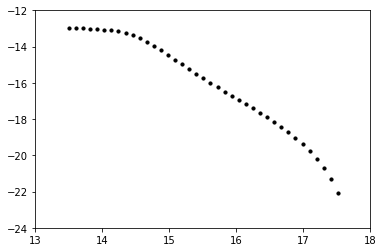

In [11]:
plt.scatter(np.log10(R), np.log10(rho), s = 10, color = 'k')
plt.xlim(13, 18)
plt.ylim(-24, -12);